In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
ta = pd.read_csv("Tel_Aviv.csv")

In [3]:
ta.head(10)

,datetime,pressure,humidity,temperature,weather,wind direction,wind speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,sky is not clear,NaN,NaN
1,2012-10-01 13:00:00,1012.0,63.0,305.470000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,1012.0,62.0,304.310000,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,1012.0,62.0,304.281841,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,1012.0,62.0,304.238015,sky is clear,0.0,0.0
5,2012-10-01 17:00:00,1012.0,62.0,304.194188,sky is clear,0.0,0.0
6,2012-10-01 18:00:00,1012.0,63.0,304.150361,sky is clear,0.0,0.0
7,2012-10-01 19:00:00,1012.0,63.0,304.106534,sky is clear,0.0,1.0
8,2012-10-01 20:00:00,1012.0,63.0,304.062708,sky is clear,0.0,1.0
9,2012-10-01 21:00:00,1012.0,64.0,304.018881,sky is clear,0.0,1.0


In [4]:
ta.drop(['pressure', 'wind direction', 'weather', 'humidity', 'wind speed'], axis = 1, inplace = True)

In [5]:
ta.rename(columns = {'datetime': 'ds', 'temperature': 'y'}, inplace = True)
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,305.470000
2,2012-10-01 14:00:00,304.310000
3,2012-10-01 15:00:00,304.281841
4,2012-10-01 16:00:00,304.238015


In [6]:
ta.tail()

,ds,y
45248,2017-11-29 20:00:00,NaN
45249,2017-11-29 21:00:00,NaN
45250,2017-11-29 22:00:00,NaN
45251,2017-11-29 23:00:00,NaN
45252,2017-11-30 00:00:00,NaN


In [7]:
ta['ds'] = pd.to_datetime(ta['ds'])

In [8]:
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,305.470000
2,2012-10-01 14:00:00,304.310000
3,2012-10-01 15:00:00,304.281841
4,2012-10-01 16:00:00,304.238015


In [9]:
ta.columns

Index(['ds', 'y'], dtype='object')

In [10]:
model = Prophet()
model.fit(ta)

Initial log joint probability = -21.0796


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        190380    0.00122157       41899.5       0.917       0.917      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        191045    0.00687916        102710           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        191210   0.000846704       16110.8      0.4301           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        191301   0.000347345       29505.6           1           1      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        191378   0.000850502       6068.66           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [11]:
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [12]:
# model.plot(forecast)
# plt.show()

   191423   0.000433411       6143.22      0.4963           1      706   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     699        191444   0.000416699       12345.1           1           1      821   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799        191466    7.3417e-05       6031.29      0.2295      0.2295      936   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899        191473   0.000282958       15147.9           1           1     1047   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999        191482   4.17671e-05        4369.7      0.3344      0.3344     1158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099        191487   0.000902004       1707.11           1           1     1270   
    Iter      log prob        |

In [13]:
from dateutil import rrule
from datetime import datetime, timedelta

now = datetime(2017, 12, 1, 1, 0, 0)
daysLater = now + timedelta(days=1825)

future_dates = []
for dt in rrule.rrule(rrule.HOURLY, dtstart=now, until=daysLater):
    future_dates.append(dt)
future_dates = pd.DataFrame(future_dates)
future_dates.columns = ['ds']
future_dates['ds'] = pd.to_datetime(future_dates['ds'])

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        191491   7.06306e-05       11880.6       0.707       0.707     1385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        191496   9.16983e-06       1508.86           1           1     1504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399        191499    0.00020842       7330.25      0.3027           1     1620   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499        191502   0.000295485       3090.56      0.2804           1     1730   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599        191504   4.93122e-05       2206.63      0.7845      0.7845     1835   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1636        191504    1.0823e-05       4

,ds,yhat,yhat_lower,yhat_upper
43796,2022-11-29 21:00:00,288.996313,104.113600,460.666928
43797,2022-11-29 22:00:00,288.507562,100.398436,462.675211
43798,2022-11-29 23:00:00,288.065021,102.323855,461.266188
43799,2022-11-30 00:00:00,287.689473,100.887203,462.165099
43800,2022-11-30 01:00:00,287.377276,99.900098,461.678982


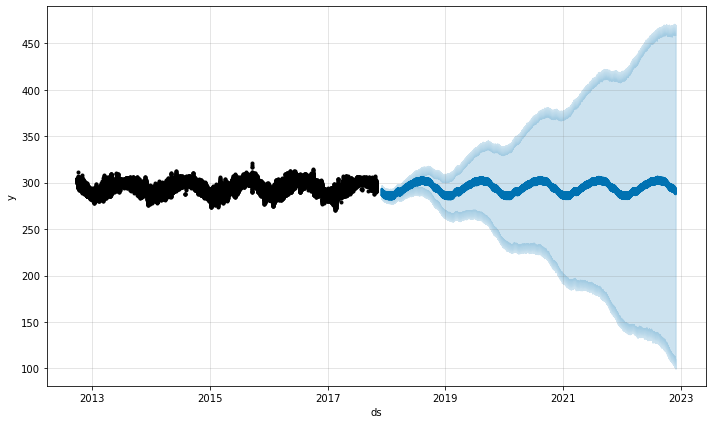

In [14]:
model.plot(forecast)
plt.show()

In [15]:
forecast = forecast[['ds', 'yhat']]
forecast['yhat'] = forecast['yhat'].round(1)
print(forecast)

                       ds   yhat
0     2017-12-01 01:00:00  286.3
1     2017-12-01 02:00:00  286.1
2     2017-12-01 03:00:00  286.1
3     2017-12-01 04:00:00  286.6
4     2017-12-01 05:00:00  287.7
...                   ...    ...
43796 2022-11-29 21:00:00  289.0
43797 2022-11-29 22:00:00  288.5
43798 2022-11-29 23:00:00  288.1
43799 2022-11-30 00:00:00  287.7
43800 2022-11-30 01:00:00  287.4

[43801 rows x 2 columns]


In [16]:
compression_opts = dict(method = 'zip', archive_name = 'Temperature.csv')  
forecast.to_csv('Temperature.zip', index = False, compression = compression_opts)